ECE4580 Homework 5 - Hiten Kothari

In [5]:
from google.colab import drive
from skimage import io,data,restoration,filters,color,measure
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Otsu Threshold: 0


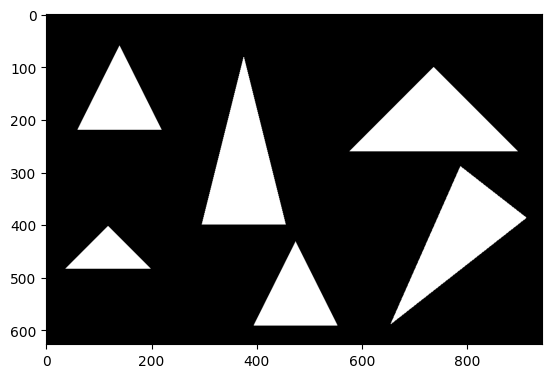

In [6]:
image = io.imread("/content/drive/MyDrive/Images/triangles.png") #loading image
gray = np.mean(image,axis=2,keepdims=False).astype('uint8') #grayscaling image

thres = filters.threshold_otsu(gray) #otsu thresholding
print("Otsu Threshold:",thres)

thres_image = gray>thres #applying the threshold
plt.imshow(thres_image,'gray')
plt.show()

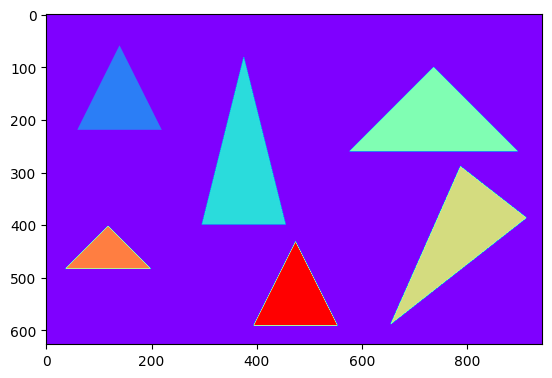

   label  bbox-0  bbox-1  bbox-2  bbox-3   area  centroid-0  centroid-1  \
0      1      60      60     220     220  12880  166.000000  139.251553   
1      2      82     296     400     456  25600  292.837500  375.500000   
2      3     101     577     261     897  25760  207.000000  736.500000   
3      4     289     655     589     913  25545  421.590605  784.885066   
4      5     403      37     484     199   6642  456.333333  117.500000   
5      6     432     395     592     554  12800  538.162500  474.000000   

        Hu1       Hu2       Hu3       Hu4           Hu5           Hu6  \
0  0.194434  0.000771  0.004636  0.000027  9.781844e-09  7.617745e-07   
1  0.263872  0.032592  0.008571  0.002316  1.032166e-05  4.181959e-04   
2  0.222215  0.012346  0.005486  0.000219 -2.407845e-07 -2.438321e-05   
3  0.263875  0.032590  0.008572  0.002316  1.031960e-05  4.181112e-04   
4  0.222193  0.012347  0.005484  0.000219 -2.405827e-07 -2.437368e-05   
5  0.194442  0.000773  0.004637  0.0

In [7]:
labels = measure.label(thres_image,background=0,connectivity=1) #connected components label
plt.imshow(labels,'rainbow')
plt.show()

table= measure.regionprops_table(labels,properties=('label','bbox','area','centroid')) #connected components stats
df1 = pd.DataFrame(table)

hu_moment= []

#finding hu's moment for each component
for i in range(1,len(df1)+1):
  objimg = labels==i
  # plt.imshow(objimg)
  # plt.show()
  mu = measure.moments_central(objimg)
  nu = measure.moments_normalized(mu)
  hu = measure.moments_hu(nu)
  hu_moment.append(hu)

#converting hu's moment to dataframe and concatenating into single table
df2 = pd.DataFrame(hu_moment,columns=['Hu1','Hu2','Hu3','Hu4','Hu5','Hu6','Hu7'])

result_df = pd.concat([df1, df2], axis=1)
print(result_df)


In [8]:
#distnace matrix calculation
hu_columns = [col for col in result_df.columns if 'Hu' in col]
h = result_df[hu_columns].values
distance_matrix = cdist(h, h, metric='euclidean')
print(distance_matrix)
#decreasing the decimals for better visualization
distance_matrix = np.around(distance_matrix,4)
print(distance_matrix)

[[0.00000000e+00 7.65178597e-02 3.01079571e-02 7.65206908e-02
  3.00881110e-02 8.32680404e-06]
 [7.65178597e-02 0.00000000e+00 4.64681924e-02 4.40250676e-06
  4.64875268e-02 7.65097592e-02]
 [3.01079571e-02 4.64681924e-02 0.00000000e+00 4.64709563e-02
  2.18590268e-05 3.00998168e-02]
 [7.65206908e-02 4.40250676e-06 4.64709563e-02 0.00000000e+00
  4.64902913e-02 7.65125902e-02]
 [3.00881110e-02 4.64875268e-02 2.18590268e-05 4.64902913e-02
  0.00000000e+00 3.00799713e-02]
 [8.32680404e-06 7.65097592e-02 3.00998168e-02 7.65125902e-02
  3.00799713e-02 0.00000000e+00]]
[[0.     0.0765 0.0301 0.0765 0.0301 0.    ]
 [0.0765 0.     0.0465 0.     0.0465 0.0765]
 [0.0301 0.0465 0.     0.0465 0.     0.0301]
 [0.0765 0.     0.0465 0.     0.0465 0.0765]
 [0.0301 0.0465 0.     0.0465 0.     0.0301]
 [0.     0.0765 0.0301 0.0765 0.0301 0.    ]]


Using the distance matrix, it can be inferred that object 1 and object 6 are similar (not exactly the same) varying only in position which is invariant for Hu's moment as the values of distance matrix for those two object labels are close to zero. Object 2 and Object 4 are also similar just rotated version of each other and since Hu's moment are rotation invariant, the distance matrix gives zero. Object 3 and Object 5 are similar in shape varying only in scale and Hu's moment are scale invariant as well. Thus, the distance matrix is zero valued for those two labels.

Citation: Parts of code are from VT ECE4580 lecture 21

In [11]:
#The following two installation steps are needed to generate a PDF version of the notebook
#(These lines are needed within Google Colab, but are not needed within a local version of Jupyter notebook)
!apt-get -qq install texlive texlive-xetex texlive-latex-extra pandoc
!pip install --quiet pypandoc

In [12]:
# TO DO: Provide the full path to your Jupyter notebook file
!jupyter nbconvert --to PDF "/content/drive/My Drive/Colab Notebooks/ECE4580HW5.ipynb"

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/ECE4580HW5.ipynb to PDF
[NbConvertApp] Support files will be in ECE4580HW5_files/
[NbConvertApp] Making directory ./ECE4580HW5_files
[NbConvertApp] Making directory ./ECE4580HW5_files
[NbConvertApp] Writing 31394 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 77281 bytes to /content/drive/My Drive/Colab Notebooks/ECE4580HW5.pdf
